In [1]:
import numpy as np
import pytesseract
from PIL import Image
import cv2
import os,argparse
import matplotlib.pyplot as plt
import re

In [2]:
# read the images with text
folder_dir = r"C:\Users\Rajashri\Desktop\food_analysis\OCR-CV\Voter-ID OCR\images"

for images in os.listdir(folder_dir):
    if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
        print(images)

voter1.jpeg


In [3]:
# read the images with text
images = []
def load_images(folder):
    for filename in os.listdir(folder):
        try:
            img = plt.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
                plt.imshow(img)
                plt.show()
                
        except:
            print("Cant import " + filename)
    return images

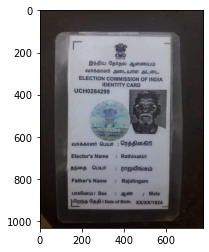

[array([[[49, 38, 34],
         [49, 38, 34],
         [49, 38, 34],
         ...,
         [57, 47, 48],
         [57, 47, 48],
         [57, 47, 48]],
 
        [[49, 38, 34],
         [49, 38, 34],
         [49, 38, 34],
         ...,
         [57, 47, 48],
         [57, 47, 48],
         [57, 47, 48]],
 
        [[49, 38, 34],
         [49, 38, 34],
         [49, 38, 34],
         ...,
         [57, 47, 48],
         [57, 47, 48],
         [57, 47, 48]],
 
        ...,
 
        [[85, 50, 22],
         [85, 50, 22],
         [85, 50, 22],
         ...,
         [30, 15, 12],
         [30, 15, 12],
         [30, 15, 12]],
 
        [[85, 50, 22],
         [85, 50, 22],
         [85, 50, 22],
         ...,
         [28, 13, 10],
         [28, 13, 10],
         [28, 13, 10]],
 
        [[85, 50, 22],
         [85, 50, 22],
         [85, 50, 22],
         ...,
         [26, 11,  8],
         [26, 11,  8],
         [26, 11,  8]]], dtype=uint8)]

In [4]:
load_images(folder_dir)

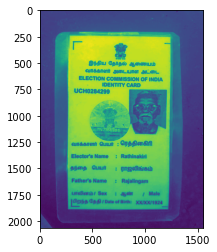

In [5]:
# resize the images
for img in images:
    img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    # convert to grayscale image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    plt.show()

### Convert image to text

In [6]:
# Defining path to tesseract.exe and the image
path_to_tesseract = r"C:\Users\Rajashri\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
pytesseract.tesseract_cmd = path_to_tesseract

In [7]:
# Extract the text from the images
path_to_images = r"C:\Users\Rajashri\Desktop\food_analysis\OCR-CV\Voter-ID OCR\images"
output_file = r"C:\Users\Rajashri\Desktop\food_analysis\OCR-CV\Voter-ID OCR\output.txt"

# Iterating the images inside the folder
for imageName in os.listdir(path_to_images):
    inputPath = os.path.join(path_to_images, imageName)
    img = Image.open(inputPath)
    
    # Extract text from image
    text = pytesseract.image_to_string(img, lang ="eng")
    
    # Write to a .txt file
    text_output = open(output_file, "a+")
    # providing the name of the image
    text_output.write(imageName + "\n")
    # providing the content in the image
    text_output.write(text + "\n")
    text_output.close()

### Read text from the output file

In [8]:
# Read the .txt file
file = open(output_file, 'r')
text = file.read()
print(text)
file.close()

voter1.jpeg
DHAwW CoHise s,enomuna
AUNTGSTN SOLWNEN Seo

ELECTION COMMISSION OF INDIA
IDENTITY CARD
UCH0284299

cundeirenit Cui

Elector's Name _: Rathinakiri

| sheng, Quut ; gmggeOmven

Father's Name : Rajalingam

uneeno/ Sex : Male
[0be SS) / Date of Birth: XX/XX/1924





In [9]:
text1 = []

# Splitting the lines to sort the text paragraph wise
lines = text.split('\n')
for lin in lines:
    s = lin.strip()
    s = s.rstrip()
    s = s.lstrip()
    text1.append(s)

In [10]:
# Using regex to find the neceesary information
def findword(textlist, wordstring):
    lineno = -1
    for wordline in textlist:
        xx = wordline.split()
        if ([w for w in xx if re.search(wordstring, w)]):
            lineno = textlist.index(wordline)
            textlist = textlist[lineno+1:]
            return textlist
    return textlist

In [11]:
# Finding the electors number 
voter_no = findword(text1, '(ELECTION COMMISSION OF INDIA|CARD|IDENTITY CARD)$')
voter_no = voter_no[0]
voter_no = voter_no.replace(" ", "")
print('Voter Number: ', voter_no)

Voter Number:  UCH0284299


In [12]:
lines = text

for x in lines.split('\n'):
    _ = x.split()
    if ([w for w in _ if re.search("(Elector's|ELECTOR'S)$", w)]):    
        person_name = x
        person_name = person_name.split(':')[1].strip()
        full_name = person_name
        print("Elector's Name: ", full_name)
        
    # Finding the father/husband/mother name        
    if ([w for w in _ if re.search("(Father's|Mother's|FATHER'S|MOTHER'S)$", w)]):
        elder_name = x
        elder_name = elder_name.split(':')[1].strip()
        print("Father's Name: ", elder_name)
        
    # Finding the gender of the electoral candidate    
    if ([w for w in _ if re.search('(sex|SEX|Sex)$', w)]):
        gender = x
        sex = gender.split(':')[1].strip()
        print('Sex: ', sex)
        
    # Finding the Date of Birth 
    if ([w for w in _ if re.search('(Year|YEAR|Birth|Date|Date of Birth|DATE OF BIRTH|DOB)$', w)]):
        dob = x
        dob = dob.split(':')[1].strip()
        print('Date of Birth: ', dob)

Elector's Name:  Rathinakiri
Father's Name:  Rajalingam
Sex:  Male
Date of Birth:  XX/XX/1924


### Dump the data into a JSON file

In [13]:
# Converting the extracted informaton into json
data = {'Voter Number':voter_no,
        'Elector Name':full_name,
        'Father Name':elder_name,
        'Sex':sex,
        'Date of Birth':dob}

In [14]:
import json
import sys
import io

with io.open(r'C:\Users\Rajashri\Desktop\food_analysis\OCR-CV\Voter-ID OCR\info.json', 'w', encoding='utf-8') as outfile:
    data = json.dumps(data, indent=4, sort_keys=True, separators=(',', ': '))
    outfile.write(data)

### Read data from the JSON file

In [15]:
with open(r'C:\Users\Rajashri\Desktop\food_analysis\OCR-CV\Voter-ID OCR\info.json', encoding = 'utf-8') as data:
    json_data = json.load(data)

In [16]:
# Extract the data from JSON file
print("Voter Number: ", json_data['Voter Number'])
print("Elector's Name: ", json_data['Elector Name'])
print("Father's Name: ", json_data['Father Name'])
print("Sex: ", json_data['Sex'])
print("Date Of Birth: ", json_data['Date of Birth'])

Voter Number:  UCH0284299
Elector's Name:  Rathinakiri
Father's Name:  Rajalingam
Sex:  Male
Date Of Birth:  XX/XX/1924
